In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


# for hypothesis testing
import scipy.stats as stats

# BUSINESS PROBLEM 1

In [2]:
loans = pd.read_csv(r"D:\Analytix lab\Senthamizhselvi Datascience_360\PYTHON\CASE STUDY\4. Basic Statistics - Hypothesis Testing\LoansData.csv")

In [3]:
loans

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [4]:
loans.head(3)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years


In [5]:
loans.columns=loans.columns.str.replace('.','_')
loans.head(3)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years


In [6]:
loans.Interest_Rate=loans.Interest_Rate.str.replace('%',' ').apply(pd.to_numeric)
loans.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [7]:
# employment length column is not required for this problem and it has many null values so drop column
loans=loans.drop(columns='Employment_Length')
loans.isna().sum()

Amount_Requested                  1
Amount_Funded_By_Investors        1
Interest_Rate                     2
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              1
State                             0
Home_Ownership                    1
Monthly_Income                    1
FICO_Range                        2
Open_CREDIT_Lines                 3
Revolving_CREDIT_Balance          3
Inquiries_in_the_Last_6_Months    3
dtype: int64

In [8]:
# null values count is very less ,so drop the rows with nullvalues
loans=loans.dropna()
loans['FICO_Score']=((loans.FICO_Range.str[0:3].astype(int))+(loans.FICO_Range.str[4:].astype(int)))/2

In [9]:
# b. Loan length is directly effecting interest rate.
loans.Loan_Length.value_counts()

Loan_Length
36 months    1941
60 months     548
Name: count, dtype: int64

In [10]:
length_36months=loans.query('Loan_Length=="36 months"').Interest_Rate
length_60months=loans.query('Loan_Length=="60 months"').Interest_Rate
length_36months.mean()

12.128907779495107

In [11]:
length_60months.mean()

16.407463503649634

In [12]:
stats.ttest_ind(length_60months,length_36months)

TtestResult(statistic=23.37963620691779, pvalue=1.9132344351585912e-109, df=2487.0)

In [13]:
#c. Interest rate varies for different purpose of loans
loans.Loan_Purpose.value_counts()

Loan_Purpose
debt_consolidation    1301
credit_card            443
other                  199
home_improvement       152
major_purchase         101
small_business          86
car                     50
wedding                 38
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: count, dtype: int64

In [14]:
debt_consolidation=loans.query('Loan_Purpose=="debt_consolidation"').Interest_Rate
credit_card=loans.query('Loan_Purpose=="credit_card"').Interest_Rate
other=loans.query('Loan_Purpose=="other"').Interest_Rate
home_improvement=loans.query('Loan_Purpose=="home_improvement"').Interest_Rate
major_purchase=loans.query('Loan_Purpose=="major_purchase"').Interest_Rate
small_business=loans.query('Loan_Purpose=="small_business"').Interest_Rate            
car=loans.query('Loan_Purpose=="car"').Interest_Rate
wedding=loans.query('Loan_Purpose=="wedding"').Interest_Rate
medical=loans.query('Loan_Purpose=="medical"').Interest_Rate
moving=loans.query('Loan_Purpose=="moving"').Interest_Rate
vacation=loans.query('Loan_Purpose=="vacation"').Interest_Rate
house=loans.query('Loan_Purpose=="house"').Interest_Rate
educational=loans.query('Loan_Purpose=="educational"').Interest_Rate
renewable_energy=loans.query('Loan_Purpose=="renewable_energy"').Interest_Rate 

In [15]:
stats.f_oneway(debt_consolidation,credit_card,other,home_improvement,major_purchase,small_business,car,wedding,medical,moving,vacation,house,educational,renewable_energy)

F_onewayResult(statistic=7.487175499510107, pvalue=1.1346364693350775e-14)

In [16]:
#d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.
loans.Home_Ownership.value_counts()

Home_Ownership
MORTGAGE    1144
RENT        1140
OWN          200
OTHER          5
Name: count, dtype: int64

In [17]:
MORTGAGE=loans.query('Home_Ownership=="MORTGAGE"').FICO_Score
RENT=loans.query('Home_Ownership=="RENT"').FICO_Score
OWN=loans.query('Home_Ownership=="OWN"').FICO_Score            
OTHER=loans.query('Home_Ownership=="OTHER"').FICO_Score
stats.f_oneway(MORTGAGE,RENT,OWN,OTHER)

F_onewayResult(statistic=23.067768208374645, pvalue=1.001016973422469e-14)

# BUSINESS PROBLEM 2

In [18]:
price_quotes = pd.read_csv(r"D:\Analytix lab\Senthamizhselvi Datascience_360\PYTHON\CASE STUDY\4. Basic Statistics - Hypothesis Testing\Price_Quotes.csv")

In [19]:
price_quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [20]:
price_quotes.head(3)

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114


In [21]:
# there is any difference in the average price quotes provided by Mary and Barry.
price_quotes.Barry_Price.mean()

124.33333333333333

In [22]:
price_quotes.Mary_Price.mean()

114.75

In [23]:
stats.ttest_ind(price_quotes.Mary_Price,price_quotes.Barry_Price)

TtestResult(statistic=-1.4147436739281787, pvalue=0.17114226132118285, df=22.0)

In [24]:
#pvalue=0.17114226132118285 which is greater than 0.05, we cannot reject null hypothesis. With 95 percent confidence interval,we cannot say that there is difference in the average price quotes provided by Mary and Barry with the help of this data .

# BUSINESS PROBLEM 3

In [25]:
data = pd.read_csv(r"D:\Analytix lab\Senthamizhselvi Datascience_360\PYTHON\CASE STUDY\4. Basic Statistics - Hypothesis Testing\Treatment_Facility.csv")

In [26]:
data

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [27]:
data.head(3)

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830


In [28]:
data=data.rename(columns={'VAR4':'TRFF','VAR5':'CI'})
data.head(3)

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830


In [29]:
# Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?
#a. is there any effect in staff turnover
prior_turnover=data.query('Reengineer=="Prior"').Employee_Turnover
post_turnover=data.query('Reengineer=="Post"').Employee_Turnover
stats.ttest_ind(prior_turnover,post_turnover)

TtestResult(statistic=-1.770306704753604, pvalue=0.09361109345535304, df=18.0)

In [30]:
#conclusion
#pvalue=0.09361109345535304 which is greater than 0.05, we cannot reject null hypothesis. With 95 percent confidence interval,we cannot say that there is effect in staff turnover with this data.

In [31]:
# b.if the reengineering effort changed the critical incidence rate.
prior_CI=data.query('Reengineer=="Prior"').CI
post_CI=data.query('Reengineer=="Post"').CI
stats.ttest_ind(prior_CI,post_CI)

TtestResult(statistic=1.627914425352865, pvalue=0.12091989189884148, df=18.0)

In [32]:
#cocclusion
#pvalue=0.12091989189884149 which is greater than 0.05, we cannot reject null hypothesis. With 95 percent confidence interval,we cannot say that the reengineering effort changed the critical incidence rate with this data.

# BUSINESS PROBLEM 4

In [33]:
priority = pd.read_csv(r"D:\Analytix lab\Senthamizhselvi Datascience_360\PYTHON\CASE STUDY\4. Basic Statistics - Hypothesis Testing\Priority_Assessment.csv")

In [34]:
priority

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [35]:
priority.head(3)

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High


In [36]:
# If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs
High=priority.query('Priority=="High"').Days
Medium=priority.query('Priority=="Medium"').Days
Low=priority.query('Priority=="Low"').Days
stats.f_oneway(High,Medium,Low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [37]:
#conclusion:

#pvalue=0.16411459461716182 which is greater than 0.05, we cannot reject null hypothesis. With 95 percent confidence interval,we cannot say that that high priority jobs are completed more quickly than medium priority jobs, and medium priority jobs are completed more quickly than low priority jobs with the help of this data.

# BUSINESS PROBLEM 5

In [38]:
films = pd.read_csv(r"D:\Analytix lab\Senthamizhselvi Datascience_360\PYTHON\CASE STUDY\4. Basic Statistics - Hypothesis Testing\Films.csv")

In [39]:
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [40]:
films.head(3)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5


In [41]:
films.Gender.value_counts()

Gender
2         194
1         104
Female     19
Male       13
Name: count, dtype: int64

In [42]:
films.Gender=np.where((films.Gender == 'Male') | (films.Gender == '1'),"Male","Female")
films.Marital_Status.value_counts()

Marital_Status
2          208
1           88
Single      18
Married     12
Slngle       2
Name: count, dtype: int64

In [43]:
films.Marital_Status=np.where((films.Marital_Status=='1') | (films.Marital_Status=='Married') ,"Married","Single" )
films.describe()

,_rowstate_,Sinage,Parking,Clean,Overall,Age,Income
count,330.0,328.000000,328.000000,327.000000,328.000000,328.000000,314.000000
mean,0.0,1.884146,1.756098,1.681957,1.618902,2.338415,1.834395
std,0.0,0.830603,0.798484,0.728313,0.689286,0.666902,0.844808
min,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,0.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,0.0,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000
max,0.0,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000


In [44]:
for i in films.columns:
    films[i]=films[i].fillna(films[i].mode()[0])  
films.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

In [45]:
# What is the overall level of customer satisfaction?
mean=films.Overall.mean()
std=films.Overall.std()
SE=std/(np.sqrt(films.shape[0]))
print(f'with 95% confidence levels,the overall level of customer satisfaction will be in the range ({mean-(1.96*SE)},{mean+(1.96*SE)})')

with 95% confidence levels,the overall level of customer satisfaction will be in the range (1.5469994901816928,1.6954247522425494)


In [46]:
# What factors are linked to satisfaction?
films.head(3)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5


In [47]:
# # factor 1 = Movie
films.Movie.value_counts()

Movie
Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: count, dtype: int64

In [48]:
Willy_Wonka=films.query('Movie=="Willy Wonka"').Overall
Ferris_Buellers_Day_Off=films.query('Movie=="Ferris Buellers Day Off"').Overall
Old_School=films.query('Movie=="Old School"').Overall
stats.f_oneway(Willy_Wonka,Ferris_Buellers_Day_Off,Old_School)

F_onewayResult(statistic=1.335243752886233, pvalue=0.2645245972839759)

In [49]:
#pvalue=0.2645245972839759 which is greater than 0.05, we cannot reject null hypothesis . With 95 percent confidence interval,we cannot say that Movie is a factor linked to satisfaction with this data.

In [50]:
# # factor 2 = Gender
Male=films.query('Gender=="Male"').Overall
Female=films.query('Gender=="Female"').Overall
stats.ttest_ind(Male,Female)

TtestResult(statistic=1.393621669674226, pvalue=0.16437541932112798, df=328.0)

In [51]:
#pvalue=0.1643754193211279 which is greater than 0.05,so, we cannot reject null hypothesis . With 95 percent confidence interval,we cannot say that Gender is a factor linked to satisfaction with this data.

In [52]:
# factor 3 = Marital_Status
Married=films.query('Marital_Status=="Married"').Overall
Single=films.query('Marital_Status=="Single"').Overall
stats.ttest_ind(Single,Married)

TtestResult(statistic=0.7171640309514444, pvalue=0.47378328196635067, df=328.0)

In [53]:
#pvalue=0.47378328196635067,which is greater than 0.05,so, we cannot reject null hypothesis . With 95 percent confidence interval,we cannot say that Marital_status is a factor linked to satisfaction with this data.

In [54]:
# factor 4 = Sinage
films.Sinage.value_counts()

Sinage
2.0    158
1.0    113
3.0     48
4.0      6
5.0      5
Name: count, dtype: int64

In [55]:
stats.pearsonr(films.Sinage,films.Overall)

PearsonRResult(statistic=0.3821028042239567, pvalue=6.501065434766993e-13)

In [56]:
#pvalue=6.501065434766499e-13,,which is less than 0.05,we can reject null hypothesis . With 95 percent confidence interval,we can say that Sinage is a factor linked to satisfaction with this data.

In [57]:
# factor 5 = Parking
stats.pearsonr(films.Parking,films.Overall)

PearsonRResult(statistic=0.5144289487855271, pvalue=1.0840276087790176e-23)

In [58]:
#pvalue=1.0840276087789895e-23 ,,which is less than 0.05,so, we can reject null hypothesis . With 95 percent confidence interval,we can say that Parking is a factor linked to satisfaction with this data.

In [59]:
# factor 6 = Clean
stats.pearsonr(films.Clean,films.Overall)

PearsonRResult(statistic=0.35082227890709206, pvalue=5.4375500074401733e-11)

In [60]:
#pvalue=5.437550007439627e-11 ,,which is less than 0.05,so, we can reject null hypothesis . With 95 percent confidence interval,we can say that Clean is a factor linked to satisfaction with this data.

In [61]:
# factor 7 = Age
films.Age.value_counts()

Age
2.0    177
3.0    117
1.0     26
4.0     10
Name: count, dtype: int64

In [62]:
one=films.query('Age==1').Overall
two=films.query('Age==2').Overall
three=films.query('Age==3').Overall
four=films.query('Age==4').Overall
print(one.mean())
print(two.mean())
print(three.mean())
print(four.mean())

1.5384615384615385
1.6779661016949152
1.547008547008547
1.7


In [63]:
stats.f_oneway(one,two,three,four)

F_onewayResult(statistic=1.0249927945692117, pvalue=0.3816737451872579)

In [64]:
#pvalue=0.3816737451872579,which is greater than 0.05,so, we cannot reject null hypothesis . With 95 percent confidence interval,we cannot say that Age is a factor linked to satisfaction with this data.

In [65]:
# factor 8= Income
films.Income.value_counts()

Income
1.0    158
3.0     90
2.0     82
Name: count, dtype: int64

In [66]:
income1=films.query('Income==1').Overall
income2=films.query('Income==2').Overall
income3=films.query('Income==3').Overall
stats.f_oneway(income1,income2,income3)

F_onewayResult(statistic=0.16488481054397225, pvalue=0.8480618362664597)

In [67]:
#pvalue=0.3816737451872579,which is greater than 0.05,so, we cannot reject null hypothesis . With 95 percent confidence interval,we cannot say that Age is a factor linked to satisfaction with this data.

In [68]:
# factor 9 = Hear_About
films.Hear_About.value_counts()

Hear_About
5      233
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: count, dtype: int64

In [69]:
Hear_About_5=films.query('Hear_About=="5"').Overall
Hear_About_4=films.query('Hear_About=="4"').Overall
Hear_About_3=films.query('Hear_About=="3"').Overall
Hear_About_2=films.query('Hear_About=="2"').Overall
Hear_About_1=films.query('Hear_About=="1"').Overall
Hear_About_2_5=films.query('Hear_About=="2,5"').Overall
Hear_About_3_4=films.query('Hear_About=="3,4"').Overall
Hear_About_4_5=films.query('Hear_About=="4,5"').Overall
Hear_About_1_5=films.query('Hear_About=="1,5"').Overall
Hear_About_5_4=films.query('Hear_About=="5,4"').Overall
Hear_About_3_5=films.query('Hear_About=="3,5"').Overall
stats.f_oneway(Hear_About_5,Hear_About_4,Hear_About_3,Hear_About_2,Hear_About_1,Hear_About_2_5,Hear_About_3_4,Hear_About_4_5,Hear_About_1_5,Hear_About_5_4,Hear_About_3_5)

F_onewayResult(statistic=1.457397539085138, pvalue=0.15433478299883888)

In [70]:
#pvalue=0.15433478299883888,which is greater than 0.05,so, we cannot reject null hypothesis . With 95 percent confidence interval,we cannot say that Hear_about is a factor linked to satisfaction with this data.

#therefore, sinage,parking and clean are factors linked to satisfaction

# What is the demographic profile of Film on the Rocks patrons?

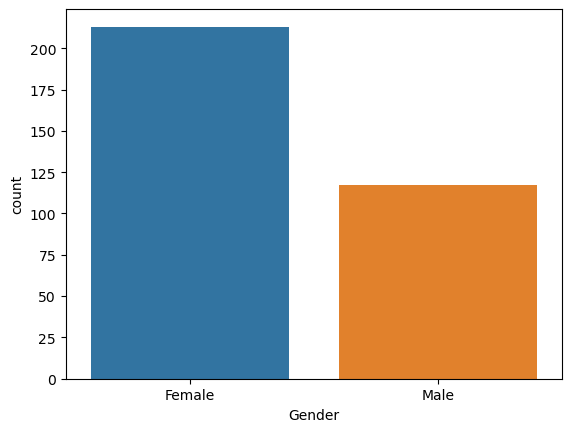

In [71]:
sns.countplot(x='Gender',data=films)
plt.show()

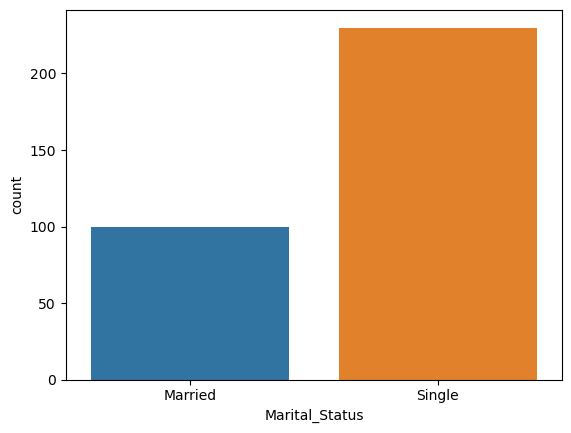

In [75]:
sns.countplot(x='Marital_Status',data=films)
plt.show()

In [76]:
b.count

<bound method DataFrame.count of   Marital_Status     count
0         Single  69.69697
1        Married  30.30303>

In [77]:
c=(((films.Age.value_counts())/(films.shape[0])*100)).reset_index()
c

,Age,count
0,2.0,53.636364
1,3.0,35.454545
2,1.0,7.878788
3,4.0,3.030303


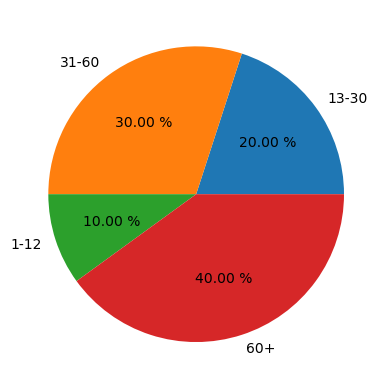

In [78]:
c=(((films.Age.value_counts())/(films.shape[0])*100)).reset_index()
c
#.reset_index().set_index('index')
plt.pie(c.Age,labels=['13-30','31-60','1-12','60+'],autopct='%0.2f %%')
plt.show()

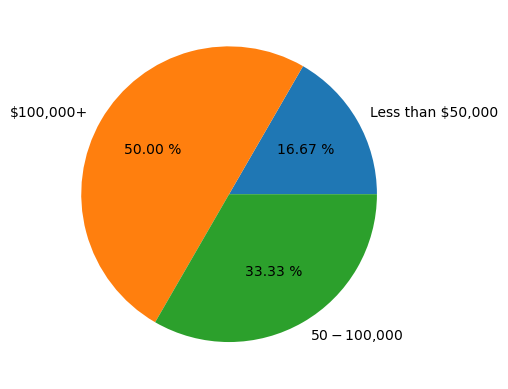

In [79]:
d=(((films.Income.value_counts())/(films.shape[0])*100)).reset_index()
d
# .reset_index().set_index('index')
plt.pie(d.Income,labels=['Less than $50,000','$100,000+','$50-$100,000'],autopct='%0.2f %%')
plt.show()

# In what media outlet(s) should the film series be advertised?

In [80]:
films.Hear_About.value_counts().reset_index().iloc[0,0]

'5'

In [81]:
#conclusion

#5 means 'word of mouth'.the film series that should be advertised by 'word of mouth'